Structured and time series data

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai.nlp import *

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

In [3]:
PATH = 'C:/input/Fast_AI/rossmann-store-sales/'

In [4]:
filenames=glob(PATH + '*.csv')
print(filenames)

['C:/input/Fast_AI/rossmann-store-sales\\googletrend.csv', 'C:/input/Fast_AI/rossmann-store-sales\\state_names.csv', 'C:/input/Fast_AI/rossmann-store-sales\\store.csv', 'C:/input/Fast_AI/rossmann-store-sales\\store_states.csv', 'C:/input/Fast_AI/rossmann-store-sales\\test.csv', 'C:/input/Fast_AI/rossmann-store-sales\\train.csv', 'C:/input/Fast_AI/rossmann-store-sales\\weather.csv']


In [5]:
tables = [pd.read_csv(fname, low_memory=False) for fname in filenames]

In [6]:
tables[0].columns

Index(['file', 'week', 'trend'], dtype='object')

In [7]:
def concat_csvs(dirname): # 目录下全部csv文件合成一个
    path = '{}{}'.format(PATH,dirname)
    filenames = glob(PATH + '*.csv')
    
    wrote_header = False
    with open(path + '.csv', 'w') as outputfile: # 输出文件
        for filename in filenames:
            name = filename.split(".")[0]
            with open(filename) as f:
                line = f.readline()
                if not wrote_header:
                    wrote_header = True
                    #outputfile.write('file,' + line)
                for line in f:
                    outputfile.write(name + ',' + line)
                outputfile.write("\n")

In [8]:
table_names = ['train', 'store', 'store_states', 'state_names', 
               'googletrend', 'weather', 'test']
# test = pd.read_csv('{}test.csv'.format(PATH), parse_dates=['Date])

In [9]:
# concat_csvs('googletrend')
# concat_csvs('weather')

In [10]:
from IPython.display import HTML,display
for t in tables: display(t.head())

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


Data Cleaning / Feature Engineering

In [11]:
len(tables)

7

In [12]:
googletrend, state_names, store, store_states, test, train, weather = tables

In [13]:
len(train), len(test)

(1017209, 41088)

In [14]:
train.StateHoliday[:5] # dtype:object

0    0
1    0
2    0
3    0
4    0
Name: StateHoliday, dtype: object

In [15]:
# turn to booleans
train.StateHoliday = train.StateHoliday != '0' # dtype: bool
test.StateHoliday = test.StateHoliday != '0'

In [16]:
train.StateHoliday[:5]

0    False
1    False
2    False
3    False
4    False
Name: StateHoliday, dtype: bool

In [17]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [18]:
weather = join_df(weather, state_names, "file","StateName") # file和StateName 相等

In [19]:
weather[:5]

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,State
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,4.0,39,26,58.0,5.08,6.0,Rain,215,NordrheinWestfalen,NW
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,10.0,24,16,NaN,0.00,6.0,Rain,225,NordrheinWestfalen,NW
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,2.0,26,21,NaN,1.02,7.0,Rain,240,NordrheinWestfalen,NW
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,2.0,23,14,NaN,0.25,7.0,Rain,263,NordrheinWestfalen,NW
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,3.0,16,10,NaN,0.00,7.0,Rain,268,NordrheinWestfalen,NW


In [20]:
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0] # 分列成两列， 
googletrend.columns
googletrend[:2]

,file,week,trend,Date
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09


In [21]:
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2] # 取state编码
googletrend.columns
googletrend[:2]

,file,week,trend,Date,State
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN


In [22]:
googletrend.loc[googletrend.State=='NI',"State"] = 'HB,NI' # loc[rows, cols], 对应行和列

In [23]:
len(googletrend[googletrend.State=='HB,NI'])

148

In [24]:
?add_datepart # 从日期衍生大量时间相关的栏位

In [25]:
add_datepart(weather,'Date', drop=False)
add_datepart(googletrend,'Date',drop=False)
add_datepart(train,'Date',drop=False)
add_datepart(test,'Date',drop=False)

In [26]:
googletrend[:2]

,file,week,trend,Date,State,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96,2012-12-02,SN,2012,12,48,2,6,337,False,False,False,False,False,False,1354406400
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95,2012-12-09,SN,2012,12,49,9,6,344,False,False,False,False,False,False,1355011200


In [27]:
trend_de = googletrend[googletrend.file=='Rossmann_DE']
trend_de[:2]

,file,week,trend,Date,State,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
148,Rossmann_DE,2012-12-02 - 2012-12-08,77,2012-12-02,None,2012,12,48,2,6,337,False,False,False,False,False,False,1354406400
149,Rossmann_DE,2012-12-09 - 2012-12-15,76,2012-12-09,None,2012,12,49,9,6,344,False,False,False,False,False,False,1355011200


outer join all of data into a single dataframe, 
注意join_df的left join时，右边栏位可能为空，使用isnull检查一下啊

In [28]:
store = join_df(store, store_states,"Store")
len(store[store.State.isnull()]) # 在join之后，检查State栏位有多少null

0

In [29]:
joined = join_df(train,store,"Store")
joined_test = join_df(test,store,"Store")
len(joined[joined.StoreType.isnull()]), len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [30]:
joined = join_df(joined,googletrend,["State","Year", "Week"])
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
joined.columns
len(joined[joined.trend.isnull()]),len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [31]:
#joined.columns, trend_de.columns
joined = joined.merge(trend_de, 'left', ["Year","Week"], suffixes=('','_DE')) # left join,如果有相同栏位名，后者加_DE后缀
joined_test = joined_test.merge(trend_de, 'left', ["Year","Week"], suffixes=('','_DE'))
len(joined[joined.trend_DE.isnull()]), len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [32]:
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'Dayofweek_y',
       'Dayofyear_y', 'Is_month_end_y', 'Is_month_start_y', 'Is_quarter_end_y',
       'Is_quarter_start_y', 'Is_year_end_y', 'Is_year_start_y', 'Elapsed_y',
       'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'State_DE', 'Month_DE',
       'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE', 'Is_month_end_DE',
       'Is_month_start_DE', 'Is_quarter_end_DE', 'Is_quarter_start_DE',
       'Is_year_end_DE', 'Is_year_start_DE',

In [33]:
joined = join_df(joined, weather, ["State","Date"])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]),len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [34]:
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'): # pd.merge在join两个df时，相同栏位则分别以_x和_y结尾
            if c in df.columns: df.drop(c, inplace=True, axis=1) # 包含相同的column，删除

In [35]:
# 填充NA (not available)
for df in (joined, joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32) #起始年度默认为1900
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32) # 起始月份为1
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)


In [36]:
for df in (joined, joined_test):
    df['CompetitionOpenSince'] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                    month=df.CompetitionOpenSinceMonth, day=15)) # 转换为时间日期格式
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days # pandas.Series.dt 日期时间类型的访问器对象

In [37]:
# df.loc定位行和列，行使用 df.column < 0 来选择
for df in (joined, joined_test):
    df.loc[df.CompetitionDaysOpen<0,"CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0 

In [38]:
#添加 "CompetitionMonthsOpen" 栏位， 限制最大到2年
for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30 # 产生天数
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24 #大于24个月的设定为24
joined.CompetitionMonthsOpen.unique()  # 栏位值看看是否在24个月以内 

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5],
      dtype=int64)

In [39]:
# 对promo dates采取相同操作, 根据year和第几周计算相应周一的具体日期
for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(x.Promo2SinceYear, x.Promo2SinceWeek).monday(),axis=1).astype(pd.datetime))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [40]:
temp = joined[["Promo2SinceYear","Promo2SinceWeek"]][:10];joined[["Promo2SinceYear","Promo2SinceWeek","Promo2Since"]][:10],temp,type(temp),type(joined)
#temp2 = joined_test[["Promo2SinceYear","Promo2SinceWeek"]][:10]
#temp["Promo2Since_B"] = pd.to_datetime(temp.apply(lambda x: Week(x.Promo2SinceYear, x.Promo2SinceWeek).monday(),axis=1).astype(pd.datetime))

(   Promo2SinceYear  Promo2SinceWeek Promo2Since
 0             1900                1  1900-01-01
 1             2010               13  2010-03-29
 2             2011               14  2011-04-04
 3             1900                1  1900-01-01
 4             1900                1  1900-01-01
 5             1900                1  1900-01-01
 6             1900                1  1900-01-01
 7             1900                1  1900-01-01
 8             1900                1  1900-01-01
 9             1900                1  1900-01-01,
    Promo2SinceYear  Promo2SinceWeek
 0             1900                1
 1             2010               13
 2             2011               14
 3             1900                1
 4             1900                1
 5             1900                1
 6             1900                1
 7             1900                1
 8             1900                1
 9             1900                1,
 pandas.core.frame.DataFrame,
 pandas.core.frame.Dat

In [41]:
for df in (joined, joined_test):
    df.loc[df.Promo2Days<0,"Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7 
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

In [42]:
joined.to_feather('{}joined'.format(PATH))
joined_test.to_feather('{}joined_test'.format(PATH))

In [43]:
len(joined.columns), len(joined.columns.unique()),joined.columns.is_unique

(80, 80, True)

In [44]:
a=set([1,2,3,3]); b=set([3,4,5]); b-a;

In [45]:
cols = set() # python 集合里面是唯一
for col in joined.columns:
    if col not in cols:
        cols.add(col)
    else:
        print(col) # StateName_y

Durations
Table更善于用于栏位分析，对一个某个栏位随着时间的变化
Time until next event
Time since last event

In [46]:
# 对每个Store，是否假日，日期三个栏位，分析相邻的两个的假日间隔了多少天
def get_elapsed(fld, pre): # 栏位，前缀
    # Datetimes and Timedeltas work together to provide ways for simple datetime calculations.
    day1 =      np.timedelta64(1,'D') # 相隔一天
    last_date = np.datetime64() # np.datetime64('2005-02-25')
    last_store = 0 #原始数据中store按照数字编码
    res = []
    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values): # store id, field, date
        if s != last_store: # 如果store不同于前一个
            last_date = np.datetime64() # 初始化时间
            last_store = s
        if v: last_date = d #如果栏位是真(是假日)，上次放假日期为当天
        res.append((d-last_date).astype('timedelta64[D]') / day1) # 距离上次日期多少天了
    df[pre+fld] = res # 增加新栏位
        

In [47]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [48]:
df = train[columns].append(test[columns])
df[:10]

,Date,Store,Promo,StateHoliday,SchoolHoliday
0,2015-07-31,1,1,False,1
1,2015-07-31,2,1,False,1
2,2015-07-31,3,1,False,1
3,2015-07-31,4,1,False,1
4,2015-07-31,5,1,False,1
5,2015-07-31,6,1,False,1
6,2015-07-31,7,1,False,1
7,2015-07-31,8,1,False,1
8,2015-07-31,9,1,False,1
9,2015-07-31,10,1,False,1


In [49]:
#分类Store, Date, 对每一行
fld = 'SchoolHoliday'
df = df.sort_values(['Store','Date']) # 默认都增量排序
get_elapsed(fld,'After') # 距离上次放假还有多少天了
#df[:20]
df = df.sort_values(['Store','Date'], ascending=[True, False]) # False按照日期递减
#df[:20]
get_elapsed(fld,'Before') # Date递减，距离下次放假还有多少天
df[:20]

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday
0,2015-09-17,1,1,False,0,13.0,NaN
856,2015-09-16,1,1,False,0,12.0,NaN
1712,2015-09-15,1,1,False,0,11.0,NaN
2568,2015-09-14,1,1,False,0,10.0,NaN
3424,2015-09-13,1,0,False,0,9.0,NaN
4280,2015-09-12,1,0,False,0,8.0,NaN
5136,2015-09-11,1,0,False,0,7.0,NaN
5992,2015-09-10,1,0,False,0,6.0,NaN
6848,2015-09-09,1,0,False,0,5.0,NaN
7704,2015-09-08,1,0,False,0,4.0,NaN


In [50]:
# 州立节假日
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [51]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [52]:
df[:3] # 当前索引为文件中行号

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
0,2015-09-17,1,1,False,0,13.0,NaN,105.0,NaN,0.0,0.0
856,2015-09-16,1,1,False,0,12.0,NaN,104.0,NaN,0.0,0.0
1712,2015-09-15,1,1,False,0,11.0,NaN,103.0,NaN,0.0,0.0


In [53]:
df = df.set_index("Date") # 将日期设置为索引
df[:3]

,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-09-17,1,1,False,0,13.0,NaN,105.0,NaN,0.0,0.0
2015-09-16,1,1,False,0,12.0,NaN,104.0,NaN,0.0,0.0
2015-09-15,1,1,False,0,11.0,NaN,103.0,NaN,0.0,0.0


In [54]:
# 将elapsed field中空值设定为0
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']
df.columns

Index(['Store', 'Promo', 'StateHoliday', 'SchoolHoliday', 'AfterSchoolHoliday',
       'BeforeSchoolHoliday', 'AfterStateHoliday', 'BeforeStateHoliday',
       'AfterPromo', 'BeforePromo'],
      dtype='object')

In [55]:
for o in ['Before','After']: # 之前get_elasped分析了after和before时间序列两个栏位
    for c in columns:
        n = o+c
        df[n] = df[n].fillna(0).astype(int) # 空值填充为0，类型是int
        

In [56]:
'''
pandas窗口函数计算rolling quantities
sort_index()排序，sum()计算感兴趣的事物,
rolling(), 
groupby()分组Store
'''

'\npandas窗口函数计算rolling quantities\nsort_index()排序，sum()计算感兴趣的事物,\nrolling(), \ngroupby()分组Store\n'

In [57]:
df[:10]

,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo
Date,,,,,,,,,,
2015-09-17,1,1,False,0,13,0,105,0,0,0
2015-09-16,1,1,False,0,12,0,104,0,0,0
2015-09-15,1,1,False,0,11,0,103,0,0,0
2015-09-14,1,1,False,0,10,0,102,0,0,0
2015-09-13,1,0,False,0,9,0,101,0,9,-1
2015-09-12,1,0,False,0,8,0,100,0,8,-2
2015-09-11,1,0,False,0,7,0,99,0,7,-3
2015-09-10,1,0,False,0,6,0,98,0,6,-4
2015-09-09,1,0,False,0,5,0,97,0,5,-5


In [58]:
# 按照index排序，分组，rolling
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum() #窗口大小为7
fwd = df[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7,min_periods=1).sum() # 倒序，

In [59]:
bwd[:10],fwd[:10]

(                  Store  SchoolHoliday  StateHoliday  Promo
 Store Date                                                 
 1     2013-01-01    1.0            1.0           1.0    0.0
       2013-01-02    2.0            2.0           1.0    0.0
       2013-01-03    3.0            3.0           1.0    0.0
       2013-01-04    4.0            4.0           1.0    0.0
       2013-01-05    5.0            5.0           1.0    0.0
       2013-01-06    6.0            6.0           1.0    0.0
       2013-01-07    7.0            7.0           1.0    1.0
       2013-01-08    7.0            7.0           0.0    2.0
       2013-01-09    7.0            7.0           0.0    3.0
       2013-01-10    7.0            7.0           0.0    4.0,
                   Store  SchoolHoliday  StateHoliday  Promo
 Store Date                                                 
 1     2015-09-17    1.0            0.0           0.0    1.0
       2015-09-16    2.0            0.0           0.0    2.0
       2015-09-15    3.

In [60]:
bwd.drop('Store',1,inplace=True) #删除Store索引，
#bwd[:10]
bwd.reset_index(inplace=True) # 重新产生新的index
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)
df.reset_index(inplace=True)
fwd[:10]

,Store,Date,SchoolHoliday,StateHoliday,Promo
0,1,2015-09-17,0.0,0.0,1.0
1,1,2015-09-16,0.0,0.0,2.0
2,1,2015-09-15,0.0,0.0,3.0
3,1,2015-09-14,0.0,0.0,4.0
4,1,2015-09-13,0.0,0.0,4.0
5,1,2015-09-12,0.0,0.0,4.0
6,1,2015-09-11,0.0,0.0,4.0
7,1,2015-09-10,0.0,0.0,3.0
8,1,2015-09-09,0.0,0.0,2.0
9,1,2015-09-08,0.0,0.0,1.0


In [61]:
# 合并
df = df.merge(bwd,'left',['Date','Store'],suffixes=['','_bw'])
df = df.merge(fwd,'left',['Date','Store'],suffixes=['','_fw'])

In [62]:
df[:10]

,Date,Store,Promo,StateHoliday,SchoolHoliday,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,1,False,0,13,0,105,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,1,False,0,12,0,104,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,1,False,0,11,0,103,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,1,False,0,10,0,102,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,0,False,0,9,0,101,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0
5,2015-09-12,1,0,False,0,8,0,100,0,8,-2,0.0,0.0,0.0,0.0,0.0,4.0
6,2015-09-11,1,0,False,0,7,0,99,0,7,-3,0.0,0.0,0.0,0.0,0.0,4.0
7,2015-09-10,1,0,False,0,6,0,98,0,6,-4,1.0,0.0,1.0,0.0,0.0,3.0
8,2015-09-09,1,0,False,0,5,0,97,0,5,-5,2.0,0.0,2.0,0.0,0.0,2.0
9,2015-09-08,1,0,False,0,4,0,96,0,4,-6,3.0,0.0,3.0,0.0,0.0,1.0


In [63]:
df.columns.is_unique #True
len(df.columns) #17
df.drop(columns,1,inplace=True) #删除某些栏位，沿着列方向
len(df.columns) #14

14

In [64]:
# 大的中间结果最好保存起来
df.to_feather('{}df'.format(PATH))

In [65]:
#temp = df
#df = pd.read_feather('{}df'.format(PATH)) # read_feather错误,改成一下方式
import feather
df = feather.read_dataframe('{}df'.format(PATH))

In [66]:
#temp.shape[0] * temp.shape[1],(temp==df).sum(axis=1).sum() # 完全相等

In [67]:
type(df.Date) # 文件读取以后，是Series
df['Date'] = pd.to_datetime(df.Date)
type(df.Date)

pandas.core.series.Series

In [68]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [69]:
joined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'file_DE', 'week_DE', 'trend_DE', 'Date_DE',
       'State_DE', 'Month_DE', 'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE',
       'Is_month_end_DE', 'Is_month_start_DE', 'Is_quarter_end_DE',
       'Is_quarter_start_DE', 'Is_year_end_DE', 'Is_year_start_DE',
       'Elapsed_DE', 'Max_TemperatureC', 'Mean_TemperatureC',
       'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea

In [70]:
joined = join_df(joined,df,['Store','Date'])
joined_test = join_df(joined_test,df,['Store','Date'])

In [71]:
# 移除销售而为0的门店
# 猜想门店可能关门，或者翻新而停止营业，重新开门后
# 放弃利用这些信息，因为不稳定的行为
joined = joined[joined.Sales!=0]

In [72]:
# 在移除某些行以后，再次重置索引
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)
joined[:10]

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,0,1,5,2015-07-31,5263,555,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,7.0,0.0,5.0
1,1,2,5,2015-07-31,6064,625,1,1,False,1,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
2,2,3,5,2015-07-31,8314,821,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
3,3,4,5,2015-07-31,13995,1498,1,1,False,1,...,67,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
4,4,5,5,2015-07-31,4822,559,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
5,5,6,5,2015-07-31,5651,589,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,1.0,0.0,1.0
6,6,7,5,2015-07-31,15344,1414,1,1,False,1,...,67,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
7,7,8,5,2015-07-31,8492,833,1,1,False,1,...,67,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
8,8,9,5,2015-07-31,8565,687,1,1,False,1,...,57,0,0,0,5.0,0.0,5.0,5.0,0.0,5.0
9,9,10,5,2015-07-31,7185,681,1,1,False,1,...,67,0,0,0,7.0,0.0,5.0,7.0,0.0,5.0


In [73]:
#再次保存
joined.to_feather('{}joined2'.format(PATH))
joined_test.to_feather('{}joined_test2'.format(PATH))

In [74]:
cols = set() # python 集合里面是唯一
for col in joined.columns:
    if col not in cols:
        cols.add(col)
    else:
        print(col) # StateName_y

In [75]:
# 现在有了最终特征工程后的features
# Create features

In [76]:
joined.head().T.head(20)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [77]:
# 特征工程已经完成
# convert to input compatible with neural network
# this includes converting categorical variables into contiguous integers of one-hot encondings,
# normalizing continuous feathres to standard normal.etc...

In [78]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

n = len(joined); n

844338

In [79]:
len(joined.columns)

93

In [80]:
dep = 'Sales' #因变量
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy()

In [81]:
len(joined.columns)

40

In [82]:
joined_test[dep] = 0 # test数据集没有Sales栏位
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date', 'Id']].copy() # 观察数据
joined.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales,Date
0,1,5,2015,7,31,False,24,0,c,a,...,11,1.0,85,83,57,0,1,1,5263,2015-07-31
1,2,5,2015,7,31,False,24,25,a,a,...,11,4.0,80,83,67,0,1,1,6064,2015-07-31
2,3,5,2015,7,31,False,24,25,a,a,...,5,2.0,86,83,57,0,1,1,8314,2015-07-31
3,4,5,2015,7,31,False,24,0,c,c,...,16,6.0,74,83,67,0,1,1,13995,2015-07-31
4,5,5,2015,7,31,False,3,0,a,a,...,11,4.0,82,83,57,0,1,1,4822,2015-07-31


In [83]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()
joined.head()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales,Date
0,1,5,2015,7,31,False,24,0,c,a,...,11,1.0,85,83,57,0,1,1,5263,2015-07-31
1,2,5,2015,7,31,False,24,25,a,a,...,11,4.0,80,83,67,0,1,1,6064,2015-07-31
2,3,5,2015,7,31,False,24,25,a,a,...,5,2.0,86,83,57,0,1,1,8314,2015-07-31
3,4,5,2015,7,31,False,24,0,c,c,...,16,6.0,74,83,67,0,1,1,13995,2015-07-31
4,5,5,2015,7,31,False,3,0,a,a,...,11,4.0,82,83,57,0,1,1,4822,2015-07-31


In [84]:
apply_cats(joined_test,joined) # joined的栏位类别编码方式对joint_test进行相同编

In [85]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32') # 连续变量的空值填充为0
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [86]:
idxs = get_cv_idxs(n, val_pct=150000/n) # 抽样得到数据的索引
joined_samp = joined.iloc[idxs].set_index("Date") # 根据行号定位，再重设索引
samp_size = len(joined_samp); samp_size

150000

In [87]:
# 如果想取整个数据集
#samp_size = n
#joined_samp = joined.set_index("Date")

In [88]:
joined_samp.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-16,257,2,2015,6,16,False,24,0,a,a,...,18.0,8.0,6.0,63.0,71.0,22.0,0.0,1.0,0.0,5934
2013-10-30,4,3,2013,10,30,False,24,0,c,c,...,29.0,16.0,2.0,74.0,66.0,27.0,-56.0,0.0,0.0,7800


In [89]:
df,y,nas,mapper = proc_df(joined_samp, 'Sales', do_scale=True)
yl = np.log(y)

In [90]:
joined_test = joined_test.set_index("Date")

In [91]:
df_test,_,nas,mapper = proc_df(joined_test, 'Sales', do_scale=True, skip_flds=['Id'],
                                  mapper=mapper, na_dict=nas)

In [92]:
df.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-16,257,2,3,6,16,1,25,1,1,1,...,-0.756430,-0.519502,-0.651394,0.413263,-0.194358,0.487305,-0.525077,1.128737,1.115768,-0.489079
2013-10-30,4,3,1,10,30,1,25,1,3,3,...,-0.095984,0.704530,0.700532,-1.400579,0.769911,-0.026011,-0.363976,-0.591499,-0.896244,-0.489079


In [93]:
mapper

DataFrameMapper(default=False, df_out=False,
        features=[(['CompetitionDistance'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Max_TemperatureC'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Mean_TemperatureC'], StandardScaler(copy=True, with_mean=True, with_std=True)), (['Min_TemperatureC'], StandardScaler(co...rue, with_std=True)), (['SchoolHoliday'], StandardScaler(copy=True, with_mean=True, with_std=True))],
        input_df=False, sparse=False)

In [94]:
# 在时间序列数据中，cross-validataion不是随机的，在真实系统中通常用最新的
# 这次根据时间排序取最后25%的作为验证集

In [95]:
train_ratio = 0.75
train_size = int(samp_size * train_ratio);train_size
val_idx = list(range(train_size,len(df))) # 取最后25%

In [96]:
# 取验证机方法二：取和测试集相同长度时间周期的数据
#val _idx = np.flatnonzero((df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1))) #时间索引
#val_idx=[0]

In [97]:
# Deep Learning
# Root-mean-squared percent errors is the metirc kaggle used for this competition

In [98]:
def inv_y(a): return np.exp(a) #指数转换，之前的y值有Log转换吗？

def exp_rmspe(y_pred,targ): #预测和目标值
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred)) / targ
    return math.sqrt((pct_var ** 2).mean())

max_log_y = np.max(y)
y_range = (0, max_log_y * 1.2)
    

In [99]:
# 创建ModelData
#?ColumnarModelData @classmehod类方法，返回了该类
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128, test_df=df_test)

In [100]:
type(md),md.path,md.trn_ds,md.val_ds,md.test_ds

(fastai.column_data.ColumnarModelData,
 'C:/input/Fast_AI/rossmann-store-sales/',
 <fastai.column_data.ColumnarDataset at 0x1d1b2cf8>)

In [101]:
# 一些类别变量有多得多，比如Store, 有上千个
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars] # 加以为了平滑？
cat_sz

[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 7),
 ('Promo_bw', 7),
 ('StateHoliday_fw', 4),
 ('StateHoliday_bw', 4),
 ('SchoolHoliday_fw', 9),
 ('SchoolHoliday_bw', 9)]

In [102]:
emb_szs = [(c,min(50,(c+1)//2)) for _,c in cat_sz];emb_szs # 限制在最多50个，

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (7, 4),
 (7, 4),
 (4, 2),
 (4, 2),
 (9, 5),
 (9, 5)]

In [103]:
# 在上述类方法中返回了一个类的实例，所以这里可以直接调用普通方法get_learner
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                  0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
m.summary() # torch

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


OrderedDict([('Embedding-1',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 50]),
                           ('trainable', True),
                           ('nb_params', tensor(55800))])),
             ('Embedding-2',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 4]),
                           ('trainable', True),
                           ('nb_params', tensor(32))])),
             ('Embedding-3',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', tensor(8))])),
             ('Embedding-4',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 7]),
                           ('trainable', True),
                           ('nb_params', tensor(91))])),
             ('Embedding-5',
              Or

In [104]:
lr = 1e-3
m.lr_find()

  0%|                                                  | 0/879 [00:00<?, ?it/s]

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   
    0      44.185995  23.613437 



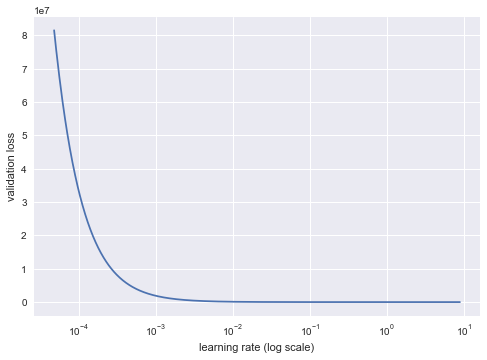

In [105]:
m.sched.plot(100)

In [106]:
#Sample
m.fit(lr, 3, metrics=[exp_rmspe])

  0%|                                                  | 0/879 [00:00<?, ?it/s]

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   exp_rmspe  
    0      76.432782  76.055637  0.999819  
    1      76.013824  75.812476  0.999815  
    2      75.927531  75.674447  0.999813  



[75.6744472298177, 0.9998130778616066]

In [107]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

  0%|                                                  | 0/879 [00:00<?, ?it/s]

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   exp_rmspe  
    0      76.977049  76.813617  0.999827  
    1      76.889362  76.814264  0.999827  
    2      76.818195  76.814264  0.999827  
    3      77.098837  76.814264  0.999827  
    4      76.892632  76.814264  0.999827  



[76.81426354085286, 0.9998268012367434]

In [108]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

  0%|                                                  | 0/879 [00:00<?, ?it/s]

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   exp_rmspe  
    0      76.836018  76.814264  0.999827  
    1      76.978416  76.814264  0.999827  
    2      76.810886  76.814264  0.999827  
    3      76.905988  76.814264  0.999827  
    4      76.876984  76.814264  0.999827  
    5      76.900221  76.814264  0.999827  
    6      76.770368  76.814264  0.999827  
    7      76.883992  76.814264  0.999827  



[76.81426354085286, 0.9998268012367434]

In [109]:
#ALL

In [110]:
?ColumnarModelData

In [111]:
?ColumnarDataset

In [112]:
?DataFrameMapper

In [113]:
?MixedInputModel

In [114]:
?Dataset

In [115]:
?ModelData

In [116]:
md

In [120]:
md,md.path,md.trn_ds,md.val_ds,md.test_ds,md.

(<fastai.column_data.ColumnarModelData at 0x1d1b2eb8>,
 'C:/input/Fast_AI/rossmann-store-sales/',
 <fastai.column_data.ColumnarDataset at 0x1d1b2cf8>)

In [ ]:
?torch.cat

In [121]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [122]:
m.fit(lr, 1, metrics=[exp_rmspe])

  0%|                                                  | 0/879 [00:00<?, ?it/s]

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   exp_rmspe  
    0      21.567506  17.293355  1728130.287951



[17.293355245157876, 1728130.2879509598]

In [123]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

  0%|                                                  | 0/879 [00:00<?, ?it/s]

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss   exp_rmspe  
    0      2.642783   0.864938   2.617313  
    1      76.844744  76.724431  0.999949  
    2      76.864565  76.814264  0.999827  



[76.81426354085286, 0.9998268012367434]

In [124]:
m.save('val0')

In [125]:
m.load('val0')

In [126]:
x,y=m.predict_with_targs()

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [127]:
exp_rmspe(x,y)

0.999826803706127

In [129]:
pred_test=m.predict(True)
pred_test = np.exp(pred_test)
joined_test['Sales']=pred_test
csv_fn='{}tmp/sub.csv'.format(PATH)
joined_test[['Id','Sales']].to_csv(csv_fn, index=False)
FileLink(csv_fn)

C:\Users\ac32\AppData\Local\Continuum\Anaconda3\lib\site-packages\torch\nn\functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


C:\input\Fast_AI\rossmann-store-sales\tmp\sub.csv

In [133]:
#RF
from sklearn.ensemble import RandomForestRegressor

In [134]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, yl)

In [135]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [136]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_, exp_rmspe(preds, y_val)

(0.9686939871947515,
 0.8667512136189104,
 0.8565431410890505,
 0.17244192237775513)

In [137]:
type(m)

sklearn.ensemble.forest.RandomForestRegressor

In [1]:
?Learner

Object `Learner` not found.


In [139]:
?nn.Module

Object `ColumnarModelData` not found.


In [3]:
?ColumnarModelData

Object `ColumnarModelData` not found.
